# Transforming Numerical Variables


Transforming variables with the logarithm function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  scipy.stats as stats
from sklearn.datasets import fetch_california_housing

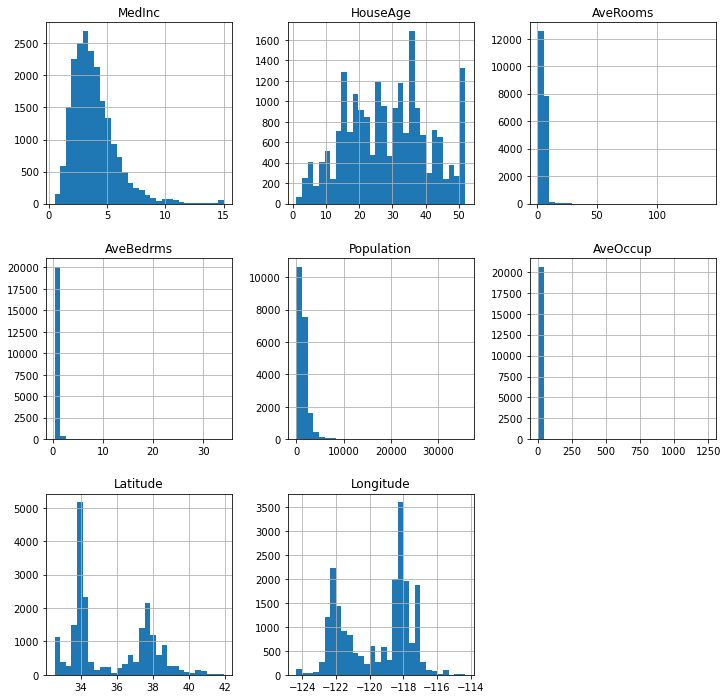

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.hist(bins=30, figsize=(12, 12))

plt.show()

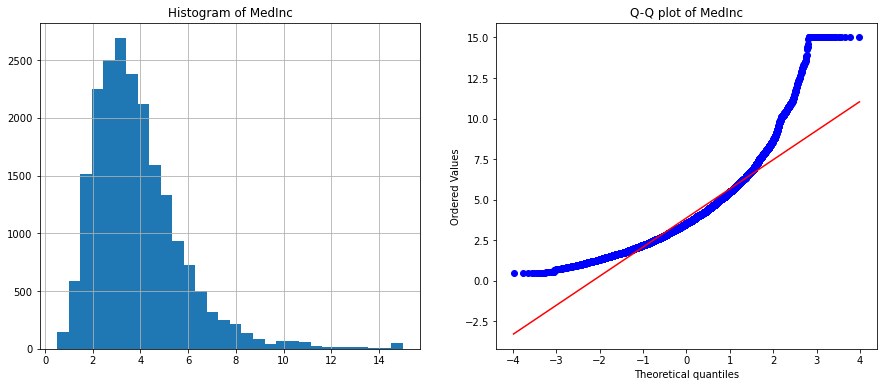

In [3]:
def diagnostic_plots(df, variable):
        plt.figure(figsize=(15,6))
        plt.subplot(1, 2, 1)
        df[variable].hist(bins=30)
        plt.title(f"Histogram of {variable}")
        plt.subplot(1, 2, 2)
        stats.probplot(df[variable], dist="norm", plot=plt)
        plt.title(f"Q-Q plot of {variable}")
        plt.show()
        
diagnostic_plots(X,"MedInc")

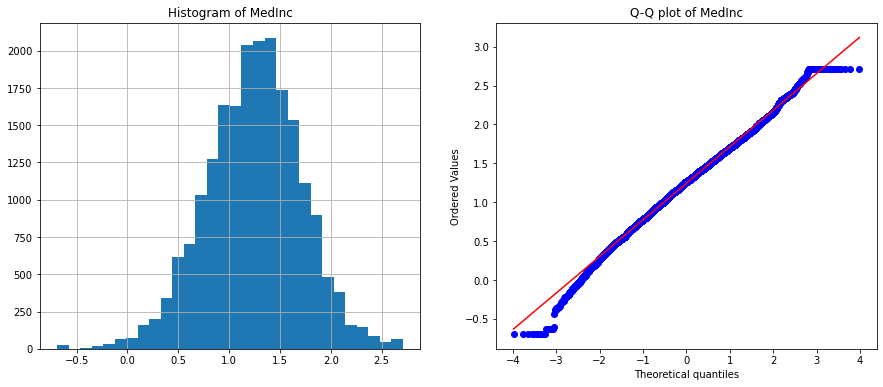

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.119287      41.0  1.943640   0.023530    5.774552  2.555556   
1      2.116424      21.0  1.830682  -0.028522    7.783641  2.109842   
2      1.982022      52.0  2.114825   0.070874    6.206576  2.802260   
3      1.730434      52.0  1.760845   0.070514    6.324359  2.547945   
4      1.347086      52.0  1.837665   0.077962    6.336826  2.181467   
...         ...       ...       ...        ...         ...       ...   
20635  0.444878      25.0  1.618488   0.125163    6.739337  2.560606   
20636  0.938756      18.0  1.810587   0.274437    5.874931  3.122807   
20637  0.530628      17.0  1.649724   0.113411    6.914731  2.325635   
20638  0.624440      18.0  1.673260   0.158643    6.608001  2.123209   
20639  0.870707      16.0  1.659126   0.150370    7.234898  2.616981   

       Latitude  Longitude  
0         37.88    -122.23  
1         37.86    -122.22  
2         37.85    -122.24  
3         37.85    -122.25  
4         37.85    -122.25  
...         ...        ...  
20635     39.48    -121.09  
20636     39.49    -121.21  
20637     39.43    -121.22  
20638     39.43    -121.32  
20639     39.37    -121.24  

[20640 rows x 8 columns]

In [4]:
# let’s make a copy of the original DataFrame using pandas copy()
X_tf = X.copy()

#make a list with the variables that we want to transform
variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

#logo transformayion
X_tf[variables] = np.log(X[variables])

#we saw that previous right skwed it will transform normal standevation
diagnostic_plots(X_tf, "MedInc")

X_tf

In [5]:
from sklearn.preprocessing import FunctionTransformer

tranform = FunctionTransformer(np.log,inverse_func=np.exp)

X_tf[variables] = tranform.transform(X[variables])



In [6]:
#this function reverse the data back to normal data 
X_tf[variables] = tranform.inverse_transform(X_tf[variables])


In [7]:
#using feature_engine

from feature_engine.transformation import LogTransformer


lt = LogTransformer(variables=variables)
lt.fit(X)

X_tf = lt.transform(X)

X_tf

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.119287      41.0  1.943640   0.023530    5.774552  2.555556   
1      2.116424      21.0  1.830682  -0.028522    7.783641  2.109842   
2      1.982022      52.0  2.114825   0.070874    6.206576  2.802260   
3      1.730434      52.0  1.760845   0.070514    6.324359  2.547945   
4      1.347086      52.0  1.837665   0.077962    6.336826  2.181467   
...         ...       ...       ...        ...         ...       ...   
20635  0.444878      25.0  1.618488   0.125163    6.739337  2.560606   
20636  0.938756      18.0  1.810587   0.274437    5.874931  3.122807   
20637  0.530628      17.0  1.649724   0.113411    6.914731  2.325635   
20638  0.624440      18.0  1.673260   0.158643    6.608001  2.123209   
20639  0.870707      16.0  1.659126   0.150370    7.234898  2.616981   

       Latitude  Longitude  
0         37.88    -122.23  
1         37.86    -122.22  
2         37.85    -122.24  
3         37.85    -122.25  
4         37.85    -122.25  
...         ...        ...  
20635     39.48    -121.09  
20636     39.49    -121.21  
20637     39.43    -121.22  
20638     39.43    -121.32  
20639     39.37    -121.24  

[20640 rows x 8 columns]

# Transforming variables with the reciprocal function

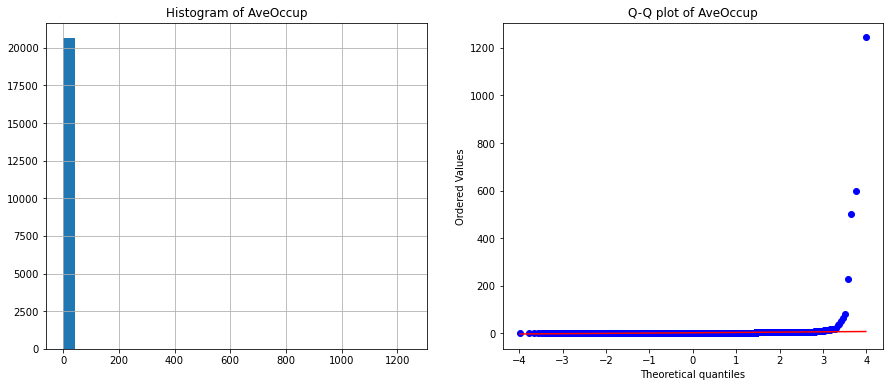

In [8]:
X, y = fetch_california_housing(return_X_y=True,as_frame=True)


#plot 
diagnostic_plots(X, "AveOccup")

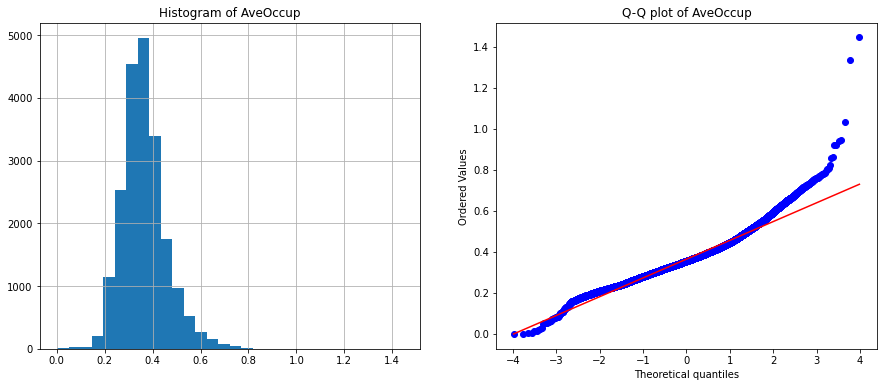

In [9]:
X_tf = X.copy()

X_tf["AveOccup"] = np.reciprocal(X_tf["AveOccup"])


#using the transformation with the diagnostic fucntion

diagnostic_plots(X_tf, "AveOccup")

In [10]:
#using sklearn
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.reciprocal)

X_tf = X.copy()

X_tf["AveOccup"] = transformer.transform(X["AveOccup"])


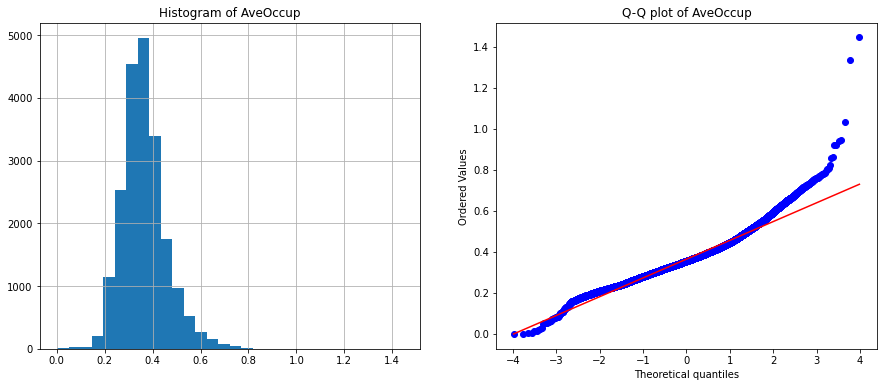

In [11]:
from feature_engine.transformation import ReciprocalTransformer

rt = ReciprocalTransformer(variables="AveOccup")

rt.fit(X)

data = rt.transform(X)

diagnostic_plots(data, "AveOccup")

# Using the square root to transform variables

#Anscombe transformation , Freeman-Tukey transformation, √x + √(x+1)

The Poisson distribution is a probability distribution that indicates the number of times an event is likely to occur. In other words, it is a count distribution. It is right-skewed and its variance equals its mean. Examples of variables that could follow a Poisson distribution are the number of financial items of a customer, such as the number of current accounts or credit cards, the number of passengers in a vehicle, and the number of occupants in a household

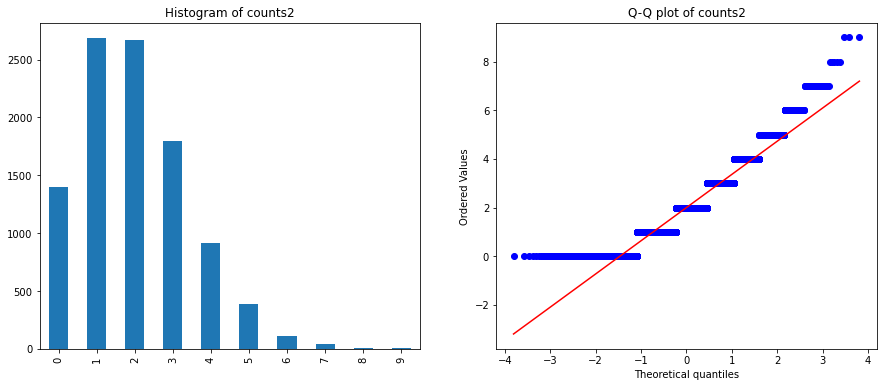

In [12]:
import numpy as np ;import pandas as pd

import scipy.stats as stats

df = pd.DataFrame()

df["counts1"] = stats.poisson.rvs(mu=3, size=10000)

df["counts2"] = stats.poisson.rvs(mu=2, size=10000)


def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].value_counts().sort_index(). plot.bar()
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()
    
    
diagnostic_plots(df, "counts2")

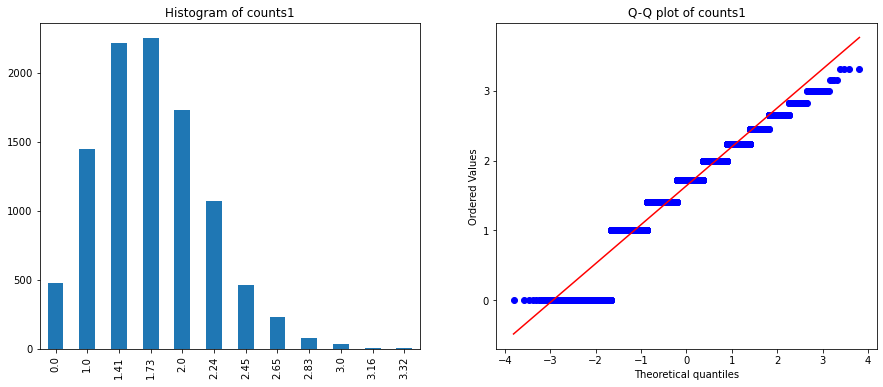

In [13]:
df_tf = df.copy()

df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1","counts2"]])


df_tf[["counts1", "counts2"]] = np.round(df_tf[["counts1", "counts2"]], 2)


diagnostic_plots(df_tf, "counts1")

In [14]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.sqrt)

df_tf = transformer.transform(df[["counts1", "counts2"]])

In [15]:
from feature_engine.transformation import PowerTransformer

root_t = PowerTransformer(exp=1/2)

root_t.fit(df)

df_tf = root_t.transform(df)



      x_anscombe  y_anscombe
0       5.049752    2.345208
1       5.049752    4.183300
2       5.049752    3.674235
3       3.674235    3.674235
4       4.636809    2.345208
...          ...         ...
9995    3.674235    2.345208
9996    3.674235    5.787918
9997    5.049752    2.345208
9998    3.082207    4.183300
9999    3.674235    1.224745

[10000 rows x 2 columns]


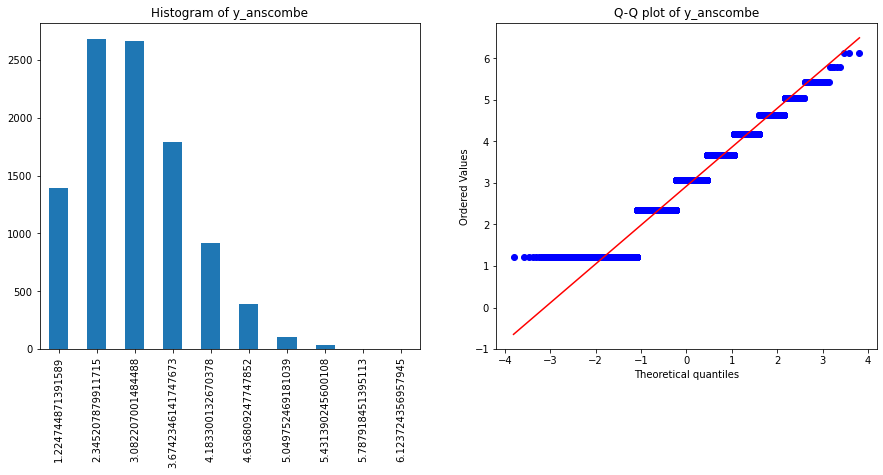

In [16]:

# Assuming you have a dataset 'df' with variables 'x' and 'y'

# Perform the Anscombe transformation
df['x_anscombe'] = 2 * np.sqrt(df['counts1'] + 3/8)
df['y_anscombe'] = 2 * np.sqrt(df['counts2'] + 3/8)

# Check the transformed variables
print(df[['x_anscombe', 'y_anscombe']])

diagnostic_plots(df, "y_anscombe")

#Using power transformations

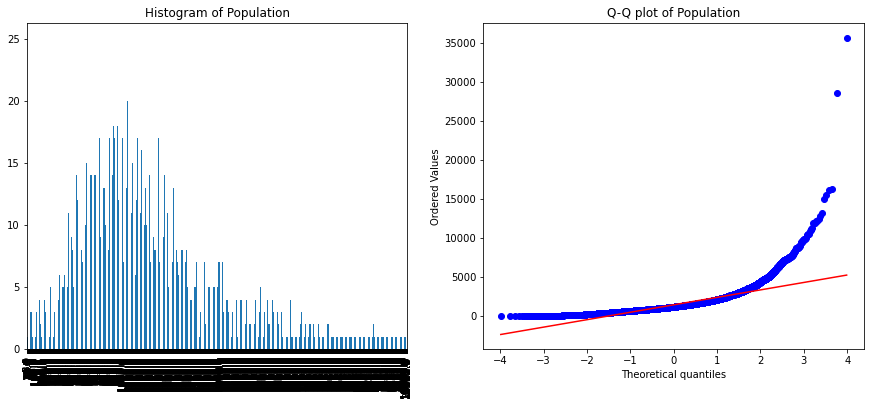

In [17]:
X_tf = X.copy()

diagnostic_plots(X, "Population")

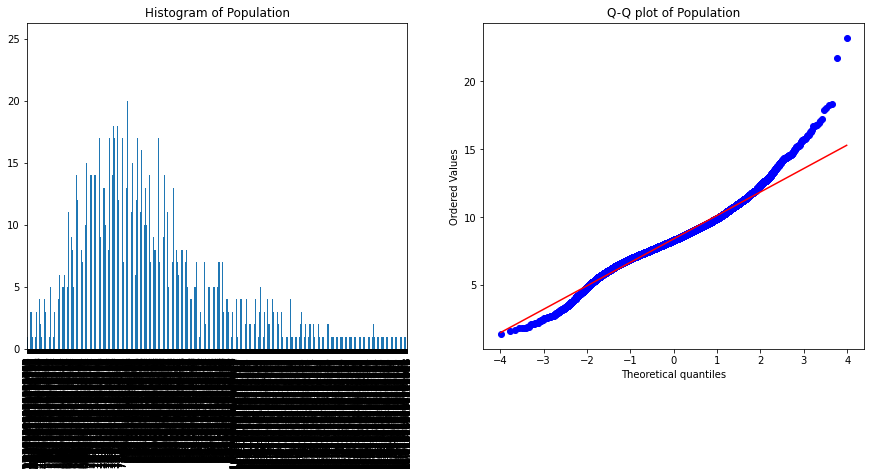

In [18]:
variables = ["MedInc", "Population"]

X_tf[variables] = np.power(X[variables], 0.3)


diagnostic_plots(X_tf, "Population")

#using exponent 0.2 are 0.3

In [20]:
power_t = PowerTransformer(variables=variables, exp=0.3)

power_t.fit(X)
X_tf = power_t.transform(X)

Performing Box-Cox transformation


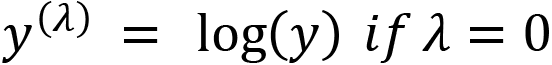

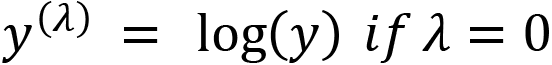

Here, y is the variable and λ is the transformation parameter. It includes important special cases of transformations, including untransformed (λ = 1), the logarithm (λ = 0), the reciprocal (λ = - 1), the square root (when λ = 0.5, it applies a scaled and shifted version of the square root function) and the cube root

The Box-Cox transformation can only be used on positive variables. If your variables have negative values, try the Yeo-Johnson transformation

In [21]:
import numpy as np

import pandas as pd

import scipy.stats as stats

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import PowerTransformer

from feature_engine.transformation import BoxCoxTransformer

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

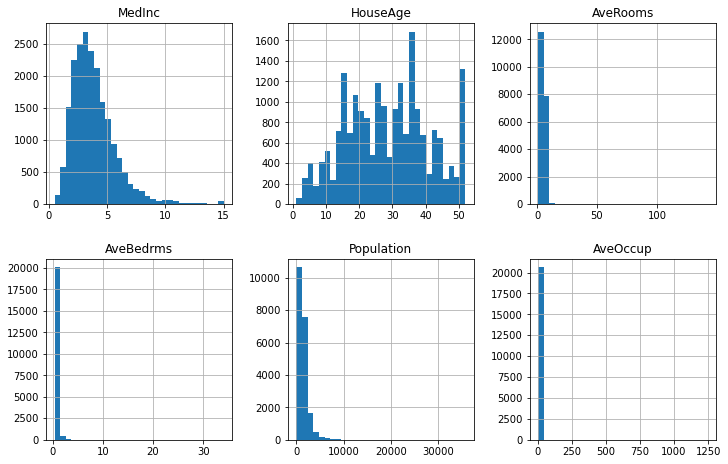

In [22]:
X.hist(bins=30, figsize=(12, 12), layout=(3, 3))

plt.show()

we can see that the MedInc variable shows a mild right-skewed distribution, variables such as AveRooms and Population are heavily right-skewed, and the HouseAge variable shows an even spread of values across its range

In [23]:
variables = list(X.columns)

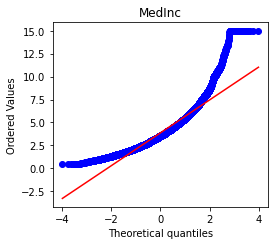

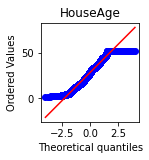

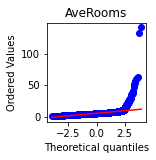

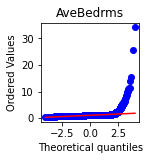

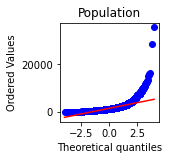

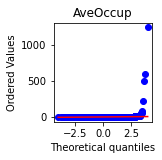

In [24]:
def make_qqplot(df):
        plt.figure(figsize=(10, 6), constrained_layout=True)
        for i in range(6):
            # location in figure
            ax = plt.subplot(2, 3, i + 1)
            # variable to plot
            var = variables[i]
            # q-q plot
            stats.probplot((df[var]), dist="norm", plot=plt)
            # add variable name as title
            ax.set_title(var)
            plt.show()
            
        
make_qqplot(X)

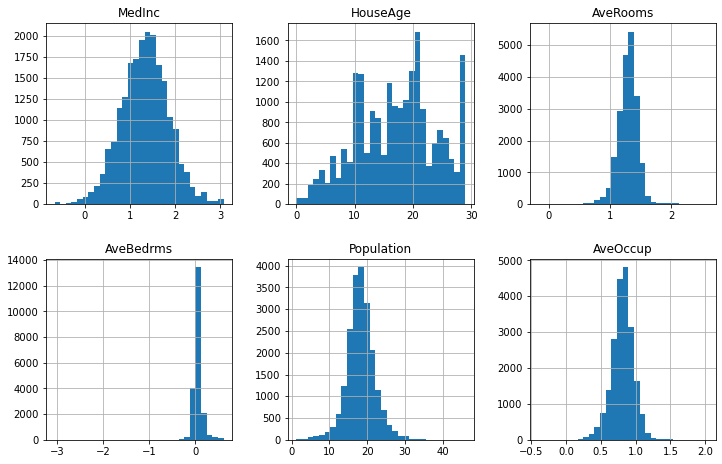

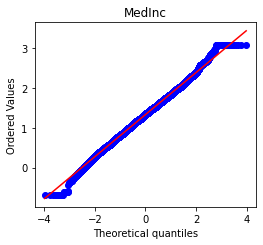

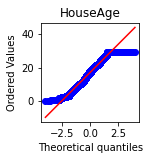

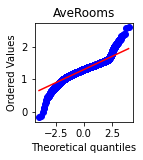

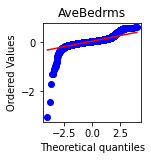

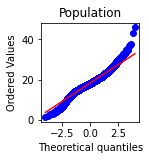

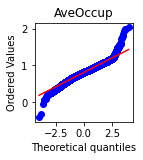

In [25]:
transformer = PowerTransformer(method="box-cox", standardize=False)

transformer.fit(X)

X_tf = transformer.transform(X)

X_tf = pd.DataFrame(X_tf, columns=variables)

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))

plt.show()

make_qqplot(X_tf)

set up BoxCoxTransformer() so that it transforms all the variables in the dataset, and then fits them to the data

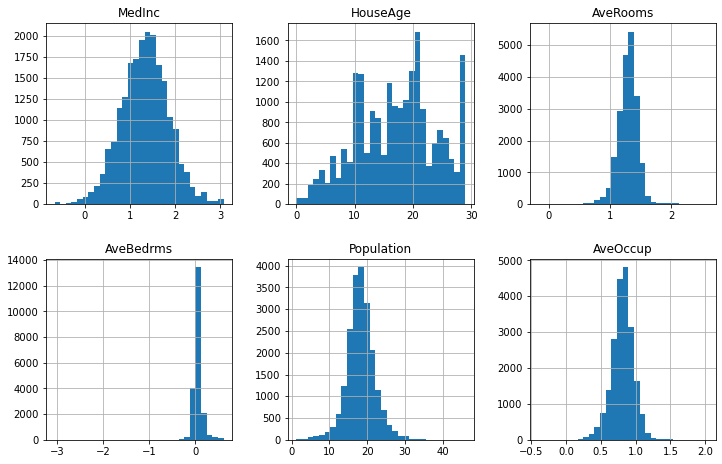

In [26]:
bct = BoxCoxTransformer()

bct.fit(X)

X_tf = bct.transform(X)

bct.lambda_dict_

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))

plt.show()

Performing Yeo-Johnson transformation

The Yeo-Johnson transformation is an extension of the Box-Cox transformation that is no longer constrained to positive values. In other words, the Yeo-Johnson transformation can be used on variables with zero and negative values, as well as positive values

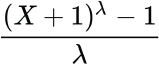

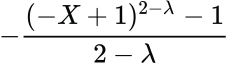

if λ ≠ 0 and X >= 0 ;ln(X + 1 ); if λ = 0 and X >= 0

if λ ≠ 2 and X < 0
-ln(-X + 1); if λ = 2 and X < 0

In [27]:
transformer = PowerTransformer(method="yeo-johnson")

transformer.fit(X)

X_tf = transformer.transform(X)

transformer.lambdas_



array([-0.19850992,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134561])

{'MedInc': -0.19850991676559598, 'HouseAge': 0.8081480895997063, 'AveRooms': -0.5536698033957893, 'AveBedrms': -4.3940822236920365, 'Population': 0.23352363517075606, 'AveOccup': -0.9013456138434744}


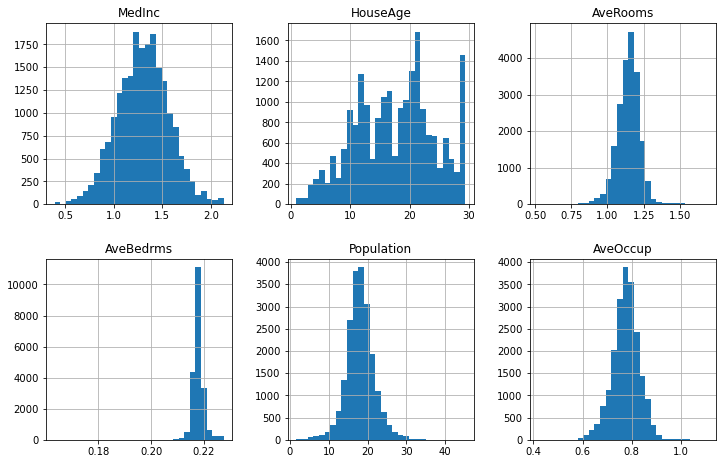

In [29]:
from feature_engine.transformation import YeoJohnsonTransformer
yjt = YeoJohnsonTransformer()
yjt.fit(X)
X_tf = yjt.transform(X)
print(yjt.lambda_dict_)

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))

plt.show()

In [ ]:
import pandas as pd
